### Wykorzystane biblioteki

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

W dalszej części zostanie jeszcze wykorzystana funkcja `Point` z biblioteki `shapely`.

### 📥 Import danych

 **Import danych**. Wykorzystaliśmy dokumentację biblioteki `pandas` https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
 Natknęliśmy się na problem formatowania polskich znaków, co zniwelowaliśmy za pomocą `encoding_errors='ignore'`.

In [ ]:
dane_mieszkania = pd.read_csv('dane/Houses.csv', encoding='utf-8', encoding_errors='ignore')

### 📋 Opis danych

`dane_mieszkania`: https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland/data informacje o cenach mieszkań, metrażu, lokalizacjach, wieku budynków.

In [ ]:
print("Rozmiar bazy danych (wiersze, kolumny):", dane_mieszkania.shape)

Rozmiar bazy danych (wiersze, kolumny): (23764, 12)


In [ ]:
print("Nazwy kolumn i typy zmiennych:", dane_mieszkania.dtypes)

Nazwy kolumn i typy zmiennych: Unnamed: 0      int64
address        object
city           object
floor         float64
id            float64
latitude      float64
longitude     float64
price         float64
rooms         float64
sq            float64
year          float64
na_metr       float64
dtype: object


In [ ]:
print("Podstawowe statystyki:")
print(dane_mieszkania.describe())

Podstawowe statystyki:
         Unnamed: 0         floor            id      latitude     longitude  \
count  23764.000000  23764.000000  23764.000000  23764.000000  23764.000000   
mean   11881.500000      2.808744  15621.964484     51.374874     19.861773   
std     6860.220235      2.463467   8617.293898      1.099836      1.447186   
min        0.000000      0.000000      1.000000     49.933056      4.204796   
25%     5940.750000      1.000000   8420.750000     50.066489     19.916563   
50%    11881.500000      2.000000  15637.500000     52.193987     19.999330   
75%    17822.250000      4.000000  23111.250000     52.267594     20.996180   
max    23763.000000     10.000000  30308.000000     54.435238     30.319403   

              price         rooms            sq         year        na_metr  
count  2.376400e+04  23764.000000  2.376400e+04  23764.00000   23764.000000  
mean   6.493536e+05      2.620771  1.027249e+02   2000.55117   10760.979594  
std    5.326970e+05      0.9965

#### 🧹  Czyszczenie danych

In [ ]:
dane_mieszkania["city"]=dane_mieszkania["city"].replace({
    "Warszawa":"Warszawa",
    "Krakw":"Kraków",
    "Pozna":"Poznań"})
display(dane_mieszkania)
dane_mieszkania.dtypes

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgrze Zabocie Stanisawa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Poudnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznań,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
23759,23759,Stare Miasto Naramowice,Poznań,0.0,3976.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,23760,Wochy,Warszawa,4.0,10206.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,23761,Nowe Miasto Malta ul. Katowicka,Poznań,0.0,4952.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,23762,Podgrze Duchackie Walerego Sawka,Kraków,6.0,24148.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


,0
Unnamed: 0,int64
address,object
city,object
floor,float64
id,float64
latitude,float64
longitude,float64
price,float64
rooms,float64
sq,float64


W powyższym przykładzie zastosowaliśmy metodę replace, by podmienic złe nazwy miast wynikające ze zczytywania danych za pomocą UTF-8. Używamy słownika aby dokonać zmiany dla wszystkich nazw (nawet tych poprawnych). Metoda jest zadawalająca ze względu na małą ilość miast.


Dane są pełne, nie zawierają missingów.

In [ ]:
print(dane_mieszkania.isnull().sum())

Unnamed: 0    0
address       0
city          0
floor         0
id            0
latitude      0
longitude     0
price         0
rooms         0
sq            0
year          0
dtype: int64


## 📊 Wstępna analiza i wizualizacja danych

Analizę zaczniemy od prostych wykresów, które przedstawią wykorzystywane dane.  

In [ ]:
dane_mieszkania['na_metr']=dane_mieszkania['price']/dane_mieszkania['sq']

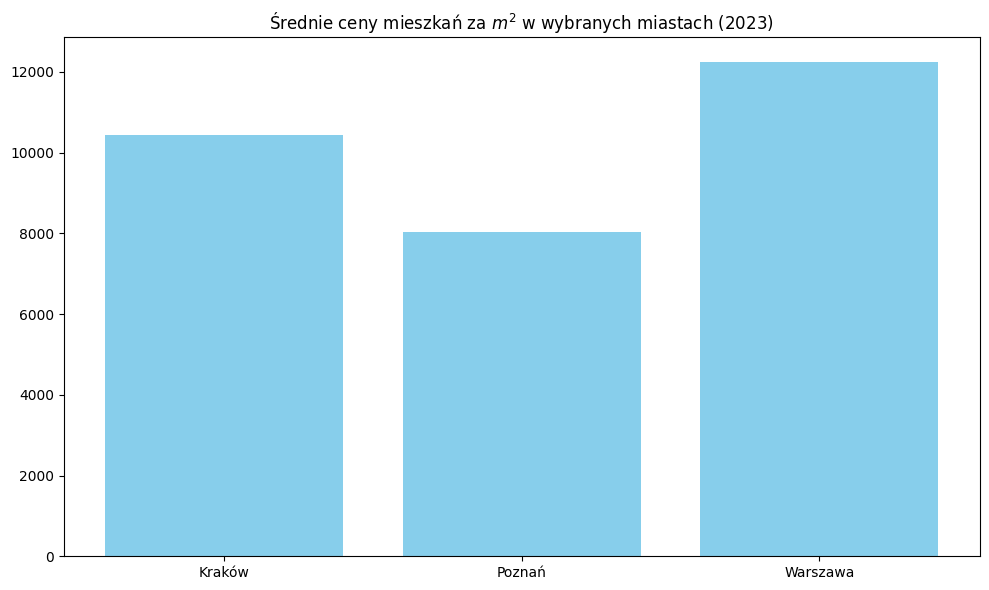

In [ ]:
avg_na_metr = dane_mieszkania.groupby('city')['na_metr'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_na_metr['city'], avg_na_metr['na_metr'], color='skyblue')
plt.title("Średnie ceny mieszkań za $m^2$ w wybranych miastach (2023)")
plt.tight_layout()
plt.show()

Następnie porównamy ilości mieszkań o poszczególnych wielkościach w naszych trzech miastach źródłowych. Do tego przydatna będzie nam metoda lambda, by użyć funkcji dla wszystkich podgrup danych.

In [ ]:
#zaczynam od stworzenia nowego dataframe do mojego wykresu
#używam metody groupby by wyciągnąć z danych źródłowych nazwy miast jako moje wiersze, a nastepnie
#za pomocą metody lambda staram się zliczyć liczbę wystapień

mieszkanie=dane_mieszkania.groupby("city").apply(lambda x: pd.Series({
    "kawalerki":(x["sq"]<30).sum(),
    "male_mieszkania":((x["sq"]>=30)&(x["sq"]<60)).sum(),
    "srednie_mieszkania":((x["sq"]>=60)&(x["sq"]<100)).sum(),
    "duze_mieszkania":(x["sq"]>=100).sum()
}),include_groups=False).reset_index()

'''
Funkcja lamba dziala nastepujaco:
x - to dana pobrana z oryginalnego dataframe
(x["sq"]>=LICZBA1)&(x["sq"]<LICZBA2) - to zawężenie warunku na wilkosc mieszkania
.sum() na końcu linijki - sumuje ilosc wystapien dla danego rodzaju z warunku
reset_index() oraz include_groups=False służą zapobieganiu nieprzyjemnym errorom/warningom w pandas

'''

mieszkanie

,city,kawalerki,male_mieszkania,srednie_mieszkania,duze_mieszkania
0,Kraków,621,5511,3105,527
1,Poznań,143,2247,1530,229
2,Warszawa,631,5254,3029,937


Poniżej korzystamy z wbudowanego do `matplotlib` pakietu pozwalającego stworzyć wykres, który wewnątrz zawiera 4 mniejsze wykresy. Pozwala to na zwiększenie przejrzystości i skondensowanie treści w przyjemny dla oka sposób. Aby dokonać tego zaczynamy od ustalenia sztywnego dla wszystkich wykresów osi OX (nazwy miast), a następnie tworzymy zwienną wykres będącą subplot wiekszej figury.

Dla danego wykresu mamy powtarzający się schemat:

1. **`wykres[x,y].bar`** - polożenie wykresu i ustalenie jego rodzaju na barplot

2. **`(x_axis, mieszkanie["NAZWA"], color="KOLOR", width="LICZBA")`** to cechy naszych wykresow tj. kolor, oś X, oś Y, i szerokość słupków

3. **`set_title(NAZWA)`** daje nam mozliwosc ustalenia nazwy poszczegolnego wykresu

4. Na koncu uzywamy **`plt.tight_layout()`** by uniknąc nachodzenia na siebie wykresów oraz pokazujemy je metoda **`plt.show()`**

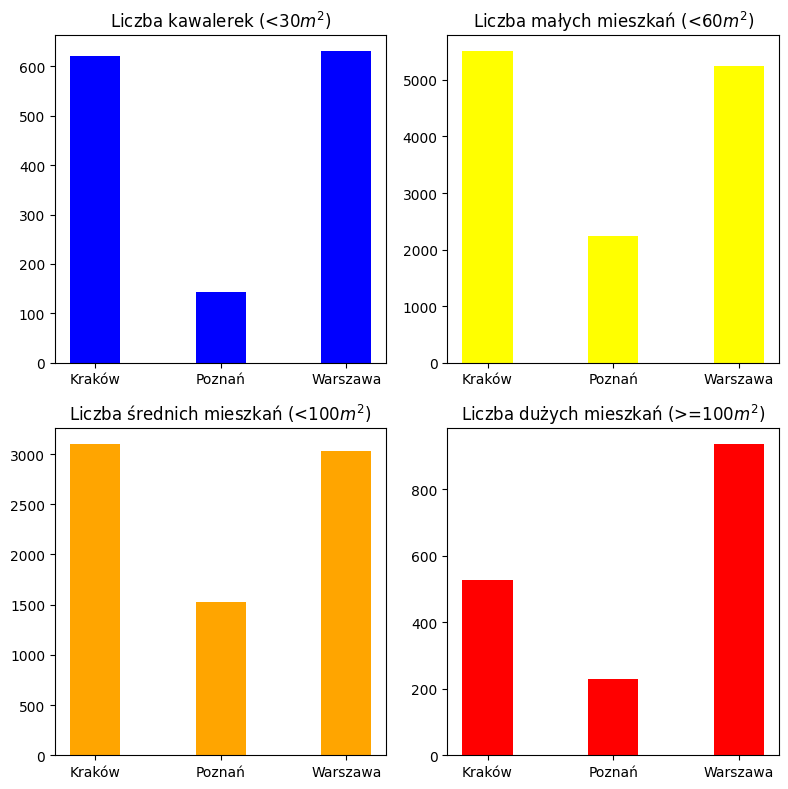

In [ ]:
x_axis=mieszkanie["city"]

fig, wykres=plt.subplots(2,2,figsize=(8,8))

wykres[0,0].bar(x_axis,mieszkanie["kawalerki"], color="blue", width=0.4)
wykres[0,0].set_title("Liczba kawalerek (<30$m^2$)")

wykres[0,1].bar(x_axis,mieszkanie["male_mieszkania"], color="yellow",width=0.4)
wykres[0,1].set_title("Liczba małych mieszkań (<60$m^2$)")

wykres[1,0].bar(x_axis,mieszkanie["srednie_mieszkania"], color="orange",width=0.4)
wykres[1,0].set_title("Liczba średnich mieszkań (<100$m^2$)")

wykres[1,1].bar(x_axis,mieszkanie["duze_mieszkania"], color="red",width=0.4)
wykres[1,1].set_title("Liczba dużych mieszkań (>=100$m^2$)")

plt.tight_layout()

plt.show()

## 🌍 Wizualizacja danych na mapie





Za pomocą matplotlib zwizualizujemy rozkład mieszkań na mapie Warszawy oraz średnie ceny za m$^2$. Najpierw wykorzystamy bibliotekę `geopandas` do wczytania konturów mapy Warszawy (źródło Github). Metoda `read_file` działa w podobny sposób do wczytywania plików w pandas. Powstały obiekt jest typu `GeoDataFrame` (gdf).


In [ ]:
warszawa = gpd.read_file("dane/warszawa-dzielnice.geojson")
type(warszawa)
display(warszawa)

,cartodb_id,name,geometry
0,1,Warszawa,"MULTIPOLYGON (((21.02753 52.36513, 21.02539 52..."
1,22,Ochota,"MULTIPOLYGON (((21.00152 52.22807, 20.99059 52..."
2,25,Rembertów,"MULTIPOLYGON (((21.13242 52.23909, 21.13313 52..."
3,2,Bemowo,"MULTIPOLYGON (((20.87309 52.21666, 20.87307 52..."
4,19,Białołęka,"MULTIPOLYGON (((20.99622 52.28734, 20.99782 52..."
5,31,Wesoła,"MULTIPOLYGON (((21.26173 52.21007, 21.26059 52..."
6,20,Bielany,"MULTIPOLYGON (((20.87715 52.29406, 20.87635 52..."
7,21,Mokotów,"MULTIPOLYGON (((21.03086 52.20686, 21.03062 52..."
8,23,Praga Południe,"MULTIPOLYGON (((21.0929 52.21532, 21.09672 52...."
9,24,Praga Północ,"MULTIPOLYGON (((21.01312 52.29485, 21.01296 52..."


Następnie `dane_mieszkania` przerabiamy na `GeoDataFrame`, ponieważ w kolejnym kroku wykorzystamy metodę [`sjoin`](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html), która umożliwi połączenie obu gdf.

W `dane_mieszkania` współrzędne geograficzne są przedstawione w dwóch kolumnach `longitude` i `latitude` a współrzędne na mapie konturowej Warszawy są reprezentowane jako punkty w kolumnie `geometry`. Żeby umożliwić złączenie, współrzędne konwertujemy za pomocą funkcji [`Point`](https://shapely.readthedocs.io/en/2.0.6/reference/shapely.Point.html) z biblioteki `shapely`.

In [ ]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(dane_mieszkania['longitude'], dane_mieszkania['latitude'])]
gdf_mieszkania = gpd.GeoDataFrame(dane_mieszkania, geometry=geometry)
gdf_mieszkania['geometry']

,geometry
0,POINT (19.97038 50.04922)
1,POINT (21.10689 52.24977)
2,POINT (19.92002 50.06696)
3,POINT (16.88254 52.40421)
4,POINT (20.97263 52.21222)
...,...
23759,POINT (16.94941 52.44965)
23760,POINT (20.94844 52.18611)
23761,POINT (16.96194 52.39734)
23762,POINT (19.95957 50.02423)


Możemy w końcu połączyć oba gdf. Domyślnie metoda `sjoin` łączy gdf po kolumnie `geometry`.

In [ ]:
gdf_warszawa = gpd.sjoin(gdf_mieszkania, warszawa, how='inner')


<ipython-input-45-20e7f835a16c>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_warszawa = gpd.sjoin(gdf_mieszkania, warszawa, how='inner')


Po stworzeniu **`gdf_warszawa`** zawierającego potrzebne nam dane geograficzne oraz dane mieszkań, możemy przystąpić do wizualizacji.

Interesuje nas stworzenie heatmapy ze średnimi cenami mieszkań za m$^2$. W tym celu wykorzystamy wykres typu [`hexbin`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html), który agreguje dane przestrzennie.

Kluczowy jest tutaj parametr C, który domyślnie jest opcjonalny. Wykorzystujemy go do zagregowania punktów z `price_per_sq`. Punkty zadeklarowane w parametrze C są uśredniane za pomocą `reduce_C_function=np.mean`. Mogliśmy pominąć ten argument, ponieważ dokumentacja matplotlib wskazuje `numpy.mean` jako domyślną wartość. Jednak uznaliśmy, że dodanie go ułatwi zrozumienie kodu.

Na koniec dodajemy `colorbar`.

<Figure size 1000x1600 with 0 Axes>

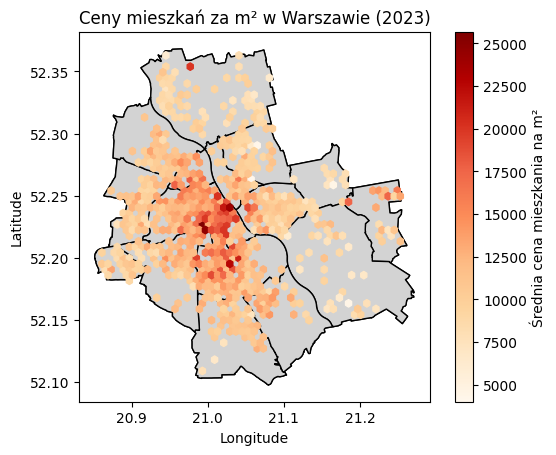

In [ ]:
plt.figure(figsize=(10, 16))
warszawa.plot(color='lightgrey', edgecolor='black')

plt.hexbin(gdf_warszawa.geometry.x, gdf_warszawa.geometry.y,  # wspolrzedne
           C=gdf_warszawa['na_metr'], gridsize=50, cmap='OrRd',
           reduce_C_function=np.mean)

cb = plt.colorbar(label='Średnia cena mieszkania na m²')

plt.title('Ceny mieszkań za m² w Warszawie (2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [ ]:
df_avg_ceny_dzielnice = gdf_warszawa[["name", "na_metr"]]
srednie_ceny_dzielnice = df_avg_ceny_dzielnice.groupby("name")["na_metr"].mean()
display(srednie_ceny_dzielnice)

,na_metr
name,
Bemowo,10635.939861
Białołęka,8545.982878
Bielany,11730.907611
Mokotów,13336.421316
Ochota,12745.547727
Praga Południe,10896.442177
Praga Północ,11820.207606
Rembertów,7442.270794
Targówek,9791.790042


### Obliczanie odległości od centrum

Informacje o koordynatach centrów miast zostały pobrane z Wikipedii. Dane są przechowywane w słowniku, a koordynaty są przekształcone przez `Point`.

In [ ]:
miasta = {
    'Warszawa': Point(21.011245, 52.229999),
    'Kraków': Point(19.937222, 50.061389),
    'Poznań': Point(16.92929, 52.41046)
}
gdf_mieszkania['centrum_miasta'] = gdf_mieszkania['city'].map(miasta)

🛠️ **Część techniczna, definicje**
- CRS (Coordinate Reference Systems)
- EPSG:4326 - koordynaty przedstawione za pomocą stopni.
- EPSG:3857 – koordynaty przedstawione jako metry.

Kod przekształca współrzędne geograficzne mieszkań i centrum miasta ze stopni (EPSG:4326) na metry (EPSG:3857), aby umożliwić dokładne obliczenia odległości. Stopnie nie są jednostką liniową, więc w tym układzie odległości byłyby nieprecyzyjne. Po konwersji obliczenia są wykonywane w metrach, a wynik podawany w kilometrach.

In [ ]:
gdf_mieszkania.set_crs(epsg=4326, inplace=True)
gdf_mieszkania = gdf_mieszkania.to_crs(epsg=3857) #transformacja do CRS w metrach (EPSG:3857)

# Transformacja punktów 'centrum_miasta' do EPSG:3857
gdf_mieszkania['centrum_miasta'] = gdf_mieszkania['centrum_miasta'].apply(
    lambda x: gpd.GeoSeries([x], crs="EPSG:4326").to_crs(epsg=3857).iloc[0]
)

Dane mają obecnie odpowiedni CRS. Następnie wykorzystamy `geopandas` oraz metodę `distance` do zmierzenia odległości lokalizacji mieszkań z `gdf_mieszkania` od centrum miasta.

⚠️ **Uwaga**: Poniższą komórkę najlepiej uruchomić za pomocą opcji `Run all` w Jupyter Notebook. Samodzielne uruchomienie może spowodować nadpisanie systemu współrzędnych, co skutkuje obliczeniem odległości w niepożądanej jednostce. **Dotyczy to wyłącznie tej komórki; pozostałe można uruchamiać niezależnie**.

In [ ]:
gdf_mieszkania['odleglosc'] = gdf_mieszkania.apply(
    lambda row: row.geometry.distance(row['centrum_miasta']) / 1000, axis=1
)
gdf_mieszkania = gdf_mieszkania.to_crs(epsg=4326)
warszawa = warszawa.to_crs(epsg=4326)

gdf_warszawa = gpd.sjoin(gdf_mieszkania, warszawa, how='inner', predicate='within')
display(gdf_warszawa[['address', 'city', 'geometry', 'odleglosc']])



,address,city,geometry,odleglosc
1,Praga-Poudnie Grochowska,Warszawa,POINT (21.10689 52.24977),11.237233
1,Praga-Poudnie Grochowska,Warszawa,POINT (21.10689 52.24977),11.237233
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,POINT (20.97263 52.21222),5.376739
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,POINT (20.97263 52.21222),5.376739
7,Mokotw Pory,Warszawa,POINT (21.0443 52.18406),9.120599
...,...,...,...,...
23757,Rembertw Gwarkw,Warszawa,POINT (21.10953 52.26325),12.500760
23760,Wochy,Warszawa,POINT (20.94844 52.18611),10.604299
23760,Wochy,Warszawa,POINT (20.94844 52.18611),10.604299
23763,Ursynw,Warszawa,POINT (21.03232 52.14104),16.321653


In [ ]:
gdf_mieszkania.groupby('city')['odleglosc'].mean()

,odleglosc
city,
Kraków,10.126537
Poznań,6.339776
Warszawa,10.418465


Możemy przejść do wizualizacji.

<Figure size 1000x1600 with 0 Axes>

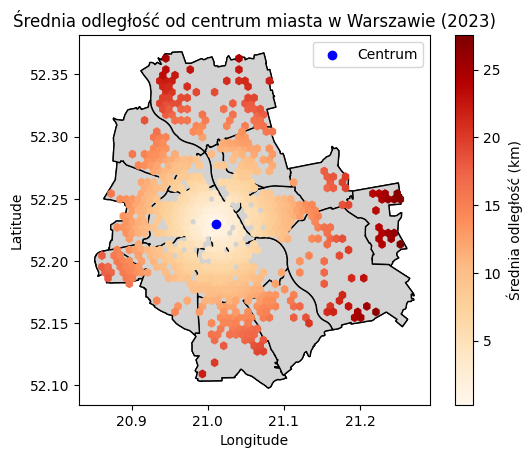

In [ ]:
plt.figure(figsize=(10, 16))
warszawa.plot(color='lightgrey', edgecolor='black')

hb = plt.hexbin(gdf_warszawa.geometry.x, gdf_warszawa.geometry.y,
                C=gdf_warszawa['odleglosc'], gridsize=50, cmap='OrRd',
                reduce_C_function=np.mean)

centrum_miasta_point = miasta['Warszawa']
plt.scatter(centrum_miasta_point.x, centrum_miasta_point.y,
            color='blue', label='Centrum', zorder=2)

cb = plt.colorbar(hb, label='Średnia odległość (km)')

plt.title('Średnia odległość od centrum miasta w Warszawie (2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')

plt.show()


## 💡 Analiza danych

Podczas analizy danych do następnych etapów napotkalismy problem z dwoma pozycjami pokazanymi poniżej, gdzie dane miały niepoprawny wiek. Postanowiliśmy je pominąć ze względu na ogromną ilość pozycji, gdzie 2 obserwacje nie wpłyną na wnioski.

In [ ]:
#wybieram te pozycje które będą mi potrzebne. Wczesniej juz odsiewajac te pozycje
#ktore dla ktorych wiek bylby niepoprawny
dane=dane_mieszkania.loc[:,('city', 'sq','price','year')] #kopiuje moj df do nowego
display(dane_mieszkania.loc[4345])
display(dane_mieszkania.loc[13963])
dane

,4345
Unnamed: 0,4345
address,Targwek Mokra
city,Warszawa
floor,8.0
id,16082.0
latitude,52.231958
longitude,21.006725
price,520000.0
rooms,3.0
sq,56.0


,13963
Unnamed: 0,13963
address,Wola
city,Warszawa
floor,1.0
id,6527.0
latitude,52.236238
longitude,20.954781
price,499497.0
rooms,1.0
sq,31.29


,city,sq,price,year
0,Kraków,74.05,749000.0,2021.0
1,Warszawa,24.38,240548.0,2021.0
2,Kraków,37.00,427000.0,1970.0
3,Poznań,166.00,1290000.0,1935.0
4,Warszawa,105.00,996000.0,2020.0
...,...,...,...,...
23759,Poznań,77.00,543000.0,2020.0
23760,Warszawa,71.00,910000.0,2017.0
23761,Poznań,50.67,430695.0,2022.0
23762,Kraków,38.86,359000.0,2021.0


W tym momencie mając już pełne dane, zaczerpaliśmy z poprzedniego df kolumnę odległość. Nastepnie zbudowaliśmy nową kolumnę z cenami na metr kwadratowy oraz z wiekiem mieszkania mierzonym od 2023 roku. Ostatecznie stosujemy nas zwłasny współczynnik zgodnie z formułą sumy poniżej.

In [ ]:
dane['odleglosc_km'] = gdf_mieszkania['odleglosc']
dane['na_metr']=dane['price']/dane['sq']
dane['wiek']=2023 - dane['year']

dane['wspolczynnik']=0.1*dane['wiek']+0.001*dane['na_metr']+0.1*dane['odleglosc_km']
dane=dane[dane['wiek']>=0]
dane

,city,sq,price,year,odleglosc_km,na_metr,wiek,wspolczynnik
0,Kraków,74.05,749000.0,2021.0,4.251167,10114.787306,2.0,10.739904
1,Warszawa,24.38,240548.0,2021.0,11.237233,9866.611977,2.0,11.190335
2,Kraków,37.00,427000.0,1970.0,2.144658,11540.540541,53.0,17.055006
3,Poznań,166.00,1290000.0,1935.0,5.327393,7771.084337,88.0,17.103824
4,Warszawa,105.00,996000.0,2020.0,5.376739,9485.714286,3.0,10.323388
...,...,...,...,...,...,...,...,...
23759,Poznań,77.00,543000.0,2020.0,7.497109,7051.948052,3.0,8.101659
23760,Warszawa,71.00,910000.0,2017.0,10.604299,12816.901408,6.0,14.477331
23761,Poznań,50.67,430695.0,2022.0,4.351584,8500.000000,1.0,9.035158
23762,Kraków,38.86,359000.0,2021.0,6.904513,9238.291302,2.0,10.128743


W tym momencie mamy wszystkie dne potrzebne do analizy. Upewniamy sie najpierw czy na pewno nie ma w df danych o ujemnym wieku. Tworzymy nowy dataframe do wykresu i wyswietlam jego zawartosc.


In [ ]:
print(len(dane[dane['wiek']<0]))
dane.loc[dane.wspolczynnik<0, "wspolczynnik"]=0
display(dane.loc[dane.wiek<0])
new_data=dane.groupby(['city'])['wspolczynnik'].mean() #nowy df do wykresu
new_data


0


,city,sq,price,year,odleglosc_km,na_metr,wiek,wspolczynnik


,wspolczynnik
city,
Kraków,13.366462
Poznań,10.589445
Warszawa,15.989094


Ponizej widoczny jest wykres średniego współczynnika dla 3 miast.

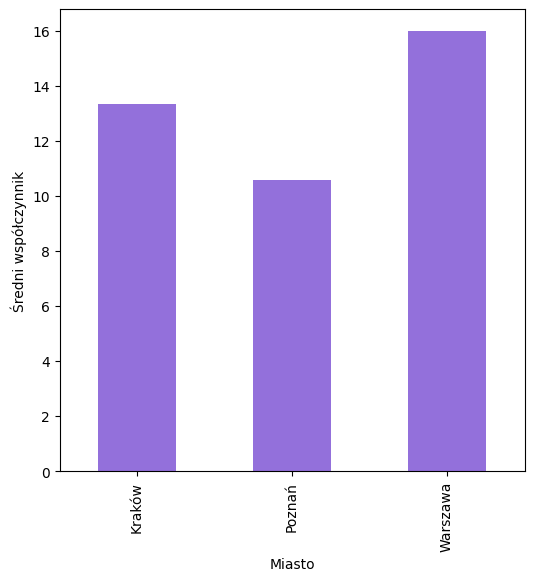

In [ ]:
ax=new_data.plot(kind="bar", figsize=(6,6), color="mediumpurple", xlabel="Miasto", ylabel="Średni współczynnik")

In [ ]:
#w tej partii kodu dziele df na nowy zaweirajacy pewien podzial
#ofert wedlug 10 grup, oscylujacych wokol sredniej dla przedzialow co 3 jednostki
podzial=dane.groupby("city").apply(lambda x: pd.Series({
    "Q1":(x["wspolczynnik"]<5).sum(),
    "Q2":((x["wspolczynnik"]>=5)&(x["wspolczynnik"]<7)).sum(),
    "Q3":((x["wspolczynnik"]>=7)&(x["wspolczynnik"]<9)).sum(),
    "Q4":((x["wspolczynnik"]>=9)&(x["wspolczynnik"]<11)).sum(),
    "Q5":((x["wspolczynnik"]>=11)&(x["wspolczynnik"]<13)).sum(),
    "Q6":((x["wspolczynnik"]>=13)&(x["wspolczynnik"]<15)).sum(),
    "Q7":((x["wspolczynnik"]>=15)&(x["wspolczynnik"]<17)).sum(),
    "Q8":((x["wspolczynnik"]>=17)&(x["wspolczynnik"]<19)).sum(),
    "Q9":((x["wspolczynnik"]>=19)&(x["wspolczynnik"]<21)).sum(),
    "Q10":(x["wspolczynnik"]>=21).sum()
}),include_groups=False)
podzial
columns_1=['Q1','Q2','Q3','Q4','Q5']
podzial2=podzial.copy()
#sprawdzamy tutaj procentowy udzial tych ofert, które są mniej więcej poniżej średniej (<13)
podzial2['procentowy_udzial_nizszych']=100*(podzial2[columns_1].sum(axis=1)/podzial2.loc[:,podzial2.columns].sum(axis=1))
podzial2=podzial2.reset_index()
podzial2

,city,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,procentowy_udzial_nizszych
0,Kraków,6,49,849,2853,2219,1515,932,411,244,686,61.204424
1,Poznań,5,53,1744,1232,518,215,92,88,141,61,85.610991
2,Warszawa,2,13,223,896,1572,2246,1974,1122,710,1091,27.474871


Kolejny wykres przedstawi nam jak ten podział wygląda w liczbach bezwzględnych.

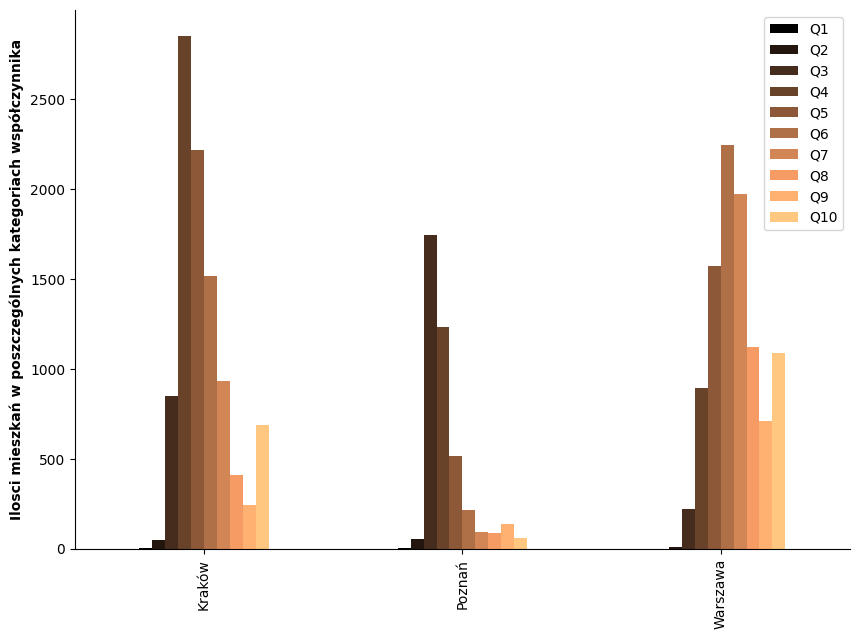

In [ ]:
bx=podzial.plot(kind="bar", figsize=(10,7), colormap='copper') #colormap nadaje gradient do wykresu by ułatwić jego czytelność
plt.xlabel('')
plt.ylabel('Ilosci mieszkań w poszczególnych kategoriach współczynnika', fontweight='bold') #zmiana czcionki
bx.spines[['top','right']].set_visible(False) #wylaczamy ramki: gorna i prawą

Kolejnym elementem analizy było zobrazowanie wczesniej policzonego procentowego udziału ofert 'korzystnych'

Text(0, 0.5, 'Miasta')

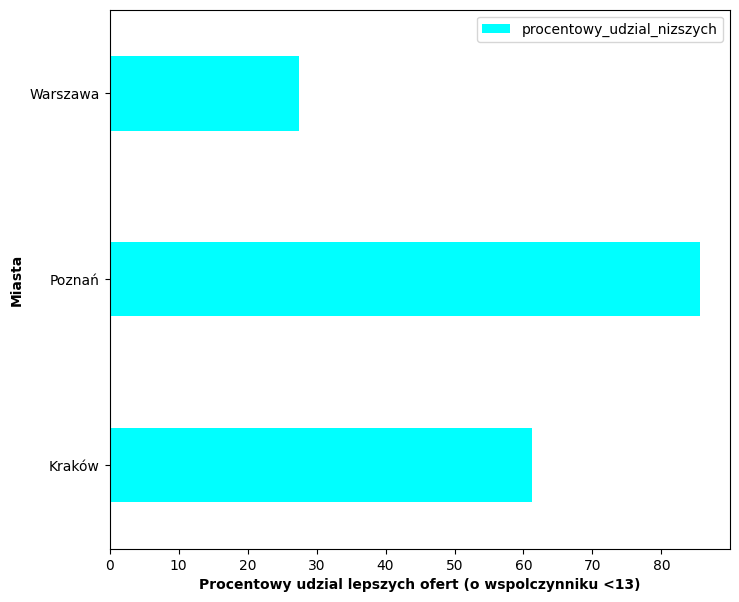

In [ ]:
podzial3=podzial2[['city','procentowy_udzial_nizszych',]]
podzial3=podzial3.set_index('city')
podzial3

cx=podzial3.plot(kind="barh", figsize=(8,7), width=0.4, color='cyan')
plt.xlabel('Procentowy udzial lepszych ofert (o wspolczynniku <13)', fontweight='bold')
plt.ylabel('Miasta', fontweight='bold')


Choć analiza danych na liczbach bezwzględnych daje dobry obraz sytuacji, postanowiliśmy ująć podziały grup w sposób procentowy, co bardziej reprezentatywnie przedstawi zawartość (udział) poszczegołnej grupy bez względu na efekt skali dla wielkości miasta (w Warszawie ofert jest po prostu wiecej niz w Poznaniu)

In [ ]:
naprocent=podzial2.copy() #kopiuje dataframe
naprocent=naprocent.set_index('city') #ustawiam ndeks w postaci nazw miast (pomaga to w wykresie)
naprocent = naprocent.drop(columns=['procentowy_udzial_nizszych']) #wyrzucamy z df kolumne o udziale procentowym
naprocent['suma']=naprocent.sum(axis=1) #sumujemy wszystkie wystapienia w datafremie wzdluz wierszy
display(naprocent)
print(naprocent.shape) #sprawdzamy wyglad naszego DF
print(naprocent.columns)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,suma
city,,,,,,,,,,,
Kraków,6,49,849,2853,2219,1515,932,411,244,686,9764
Poznań,5,53,1744,1232,518,215,92,88,141,61,4149
Warszawa,2,13,223,896,1572,2246,1974,1122,710,1091,9849


(3, 11)
Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'suma'], dtype='object')


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
city,,,,,,,,,,
Kraków,0.06,0.50,8.70,29.22,22.73,15.52,9.55,4.21,2.50,7.03
Poznań,0.12,1.28,42.03,29.69,12.48,5.18,2.22,2.12,3.40,1.47
Warszawa,0.02,0.13,2.26,9.10,15.96,22.80,20.04,11.39,7.21,11.08


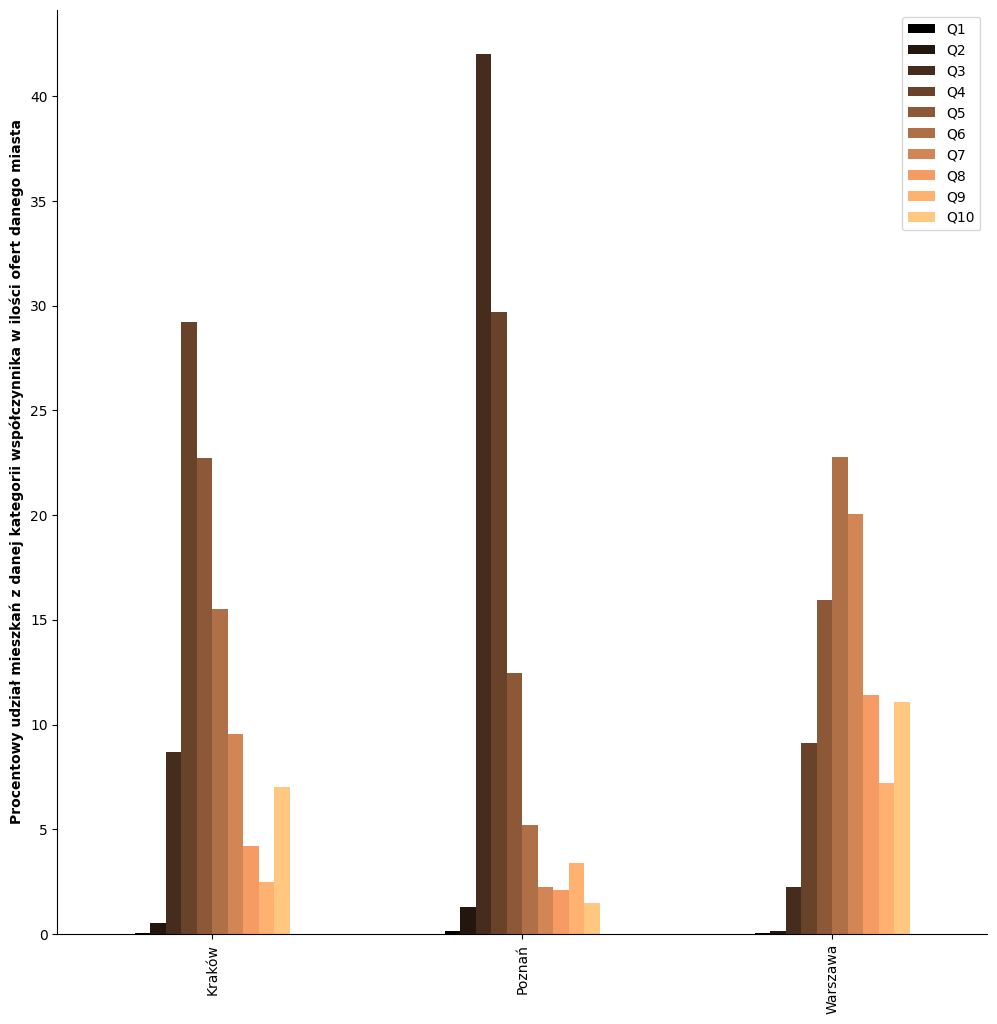

In [ ]:
do_wykresu=naprocent.copy()
cols=do_wykresu.columns
cols_1=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'suma'] #tworze liste kolumn przez ktore chce by przeszla moja funkcja
do_wykresu

#za pomoca for przechodze po kolumnach i dokonuje pelnej zamiany na procent
for col in cols_1:
    do_wykresu[col]=((do_wykresu[col]/do_wykresu['suma'])*100).round(2)

do_wykresu=do_wykresu.drop(columns=['suma']) #usuwam kolumne z suma
display(do_wykresu)
#wykres procentowy

dx=do_wykresu.plot(kind="bar", figsize=(12,12), colormap='copper')
plt.xlabel('')
plt.ylabel('Procentowy udział mieszkań z danej kategorii współczynnika w ilości ofert danego miasta', fontweight='bold')
dx.spines[['top','right']].set_visible(False)